# Regridding Black-Sea Data

In [1]:
import numpy as np

from ddsapi import Client

from geokube import AxisType, CoordType, Domain, RegularLatLon
from geokube.core.abstract.coordinate import Coordinate

### Retrieving Data with `ddsapi`

In [2]:
dataset = 'blacksea-analysis'
request =  {
    "product_type": "daily-analysis",
    "variable": "temperature",
    "time": { "year": "2018", "month": "1", "day": "1" },
    "depth": 2.5010786056518555,
    "format": "netcdf"
}

dcube = Client().retrieve(dataset, request)

2021-10-19 00:40:34,150 INFO Sending request to https://ddsapi.cmcc.it/v1/job/submit/blacksea-analysis
2021-10-19 00:40:34,503 INFO Request is Submitted
2021-10-19 00:40:34,561 INFO Request is Running
2021-10-19 00:40:44,209 INFO Request is Completed
2021-10-19 00:40:44,210 INFO Downloading https://ddsapi.cmcc.it:443/download/2021_10_18_22_40_34_300097/blacksea-analysis-daily-analysis-grid_t.nc to /tmp/ddsapi_cu20cviq/blacksea-analysis_daily-analysis_20211019004034150071.nc (1019.1K)
2021-10-19 00:40:44,823 INFO Download rate 1.6M/s
2021-10-19 00:40:44,825 INFO Opening netCDF-based hypercube...


In [3]:
temperature = dcube['temperature']

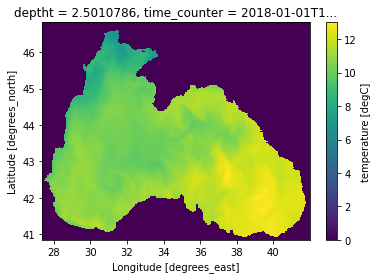

In [4]:
temperature.plot(x='nav_lon', y='nav_lat')

### Defining Target Domain

In [5]:
lat_step, lon_step = 0.1, 0.1
method = 'bilinear'

In [6]:
coords = temperature.domain.coordinate
lat, lon = coords('latitude').values, coords('longitude').values

domain = Domain(
    coordinates=[
        Coordinate(
            dims=('latitude',),
            data=np.arange(lat.min(), lat.max() + 0.5 * lat_step, lat_step),
            name='latitude',
            coord_type=CoordType.DIMENSION,
            axis_type=AxisType.LATITUDE
        ),
        Coordinate(
            dims=('longitude',),
            data=np.arange(lon.min(), lon.max() + 0.5 * lon_step, lon_step),
            name='longitude',
            coord_type=CoordType.DIMENSION,
            axis_type=AxisType.LONGITUDE
        )
    ],
    crs=RegularLatLon()
)

In [7]:
regrid_t = temperature.regrid(domain)
regrid_t.to_dict()

{'type': 'float32',
 'description': 'temperature',
 'domain': {'coord_system': {'semi_major_axis': 6371229.0,
   'semi_minor_axis': 6371229.0,
   'inverse_flattening': 0.0,
   'longitude_of_prime_meridian': 0.0,
   'name': 'latitude_longitude'},
  'time': {'values': array(['2018-01-01T12:00:00.000000000'], dtype='<U48'),
   'coord_type': 'scalar'},
  'longitude': {'values': array([27.37000084, 27.47000084, 27.57000084, 27.67000084, 27.77000084,
          27.87000084, 27.97000084, 28.07000084, 28.17000084, 28.27000084,
          28.37000084, 28.47000084, 28.57000084, 28.67000084, 28.77000084,
          28.87000084, 28.97000084, 29.07000084, 29.17000084, 29.27000084,
          29.37000084, 29.47000084, 29.57000084, 29.67000084, 29.77000084,
          29.87000084, 29.97000084, 30.07000084, 30.17000084, 30.27000084,
          30.37000084, 30.47000084, 30.57000084, 30.67000084, 30.77000084,
          30.87000084, 30.97000084, 31.07000084, 31.17000084, 31.27000084,
          31.37000084, 31.

### Visualizing Original and Regridded Data

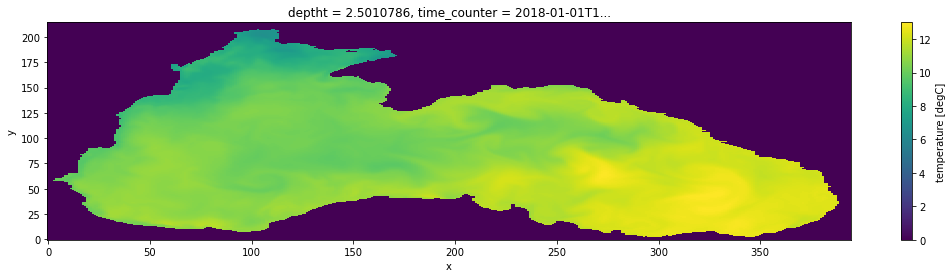

In [8]:
temperature.plot(figsize=(18, 4))

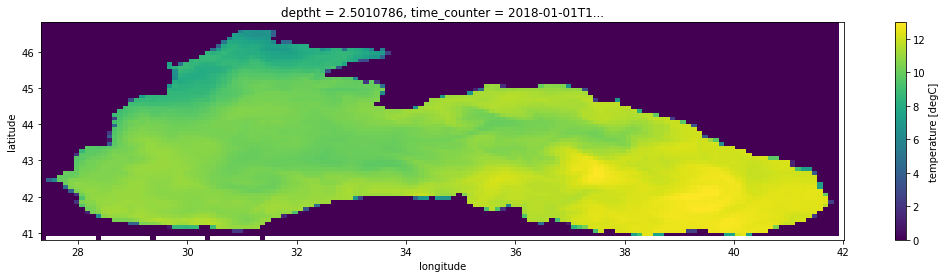

In [9]:
regrid_t.plot(figsize=(18, 4))